In [2]:
from __future__ import print_function
from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json

In [3]:
json_file = '../Mask_RCNN/datasets/canopy/train/coco_annotations.json' # # Object Instance type annotation
 # person_keypoints_val2017.json # Object Keypoint type annotation format
 # captions_val2017.json # Image Caption's annotation format
 
data=json.load(open(json_file,'r'))
 
data_2={}
data_2['info']=data['info']
data_2['licenses']=data['licenses']

print(data['images'])

# data_2['images']=[data['images'][0]] # Extract only the first image
# data_2['categories']=data['categories']
# annotation=[]
 
#  # Find all its objects by imgID
# imgID=data_2['images'][0]['id']
# for ann in data['annotations']:
#     if ann['image_id']==imgID:
#         annotation.append(ann)
        
# data_2['annotations']=annotation
 
# # Save to a new JSON file for easy viewing of data characteristics
# json.dump(data_2,open('../ANNOTATIONS/new_grid_2.json','w'),indent=4) # indent=4 More beautiful display

[{'license': 1, 'file_name': 'corte_30.tif', 'coco_url': 'empty', 'height': 256, 'width': 256, 'date_captured': '2020-01-01 00:00:00', 'flickr_url': 'empty', 'id': 30}, {'license': 1, 'file_name': 'corte_39.tif', 'coco_url': 'empty', 'height': 256, 'width': 256, 'date_captured': '2020-01-01 00:00:00', 'flickr_url': 'empty', 'id': 39}, {'license': 1, 'file_name': 'corte_40.tif', 'coco_url': 'empty', 'height': 256, 'width': 256, 'date_captured': '2020-01-01 00:00:00', 'flickr_url': 'empty', 'id': 40}, {'license': 1, 'file_name': 'corte_49.tif', 'coco_url': 'empty', 'height': 256, 'width': 256, 'date_captured': '2020-01-01 00:00:00', 'flickr_url': 'empty', 'id': 49}, {'license': 1, 'file_name': 'corte_50.tif', 'coco_url': 'empty', 'height': 256, 'width': 256, 'date_captured': '2020-01-01 00:00:00', 'flickr_url': 'empty', 'id': 50}, {'license': 1, 'file_name': 'corte_51.tif', 'coco_url': 'empty', 'height': 256, 'width': 256, 'date_captured': '2020-01-01 00:00:00', 'flickr_url': 'empty', 'i

In [8]:
coco.getImgIds(imgIds = [324158])

[324158]

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
COCO categories: 
hamlin

COCO supercategories: 
canopy


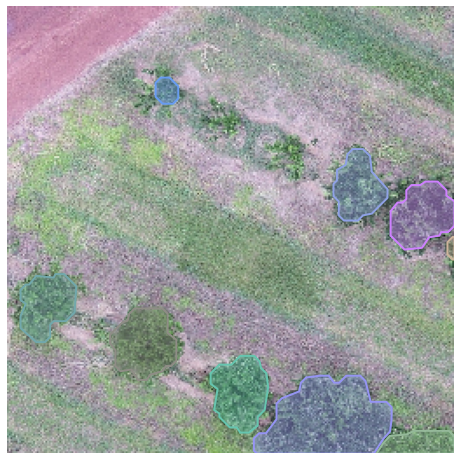

In [12]:
num_id = 73

pylab.rcParams['figure.figsize'] = (8.0, 10.0)
 
annFile='../Mask_RCNN/datasets/canopy/train/coco_annotations.json'
coco=COCO(annFile)
 
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))
 
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))
 
imgIds = coco.getImgIds(imgIds = [num_id])
# imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds[0])[0]
dataDir = '.'
dataType = 'val2017'
# I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
I = io.imread('../Mask_RCNN/datasets/canopy/train/images/{:04}.tif'.format(num_id))
 
plt.axis('off')
plt.imshow(I)
# plt.show() #No jupter não é necessario

# load and display instance annotations
#Load instance mask
# catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
# catIds=coco.getCatIds()
catIds=[]
for ann in coco.dataset['annotations']:
    if ann['image_id']==imgIds[0]:
        catIds.append(ann['category_id'])

plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)